<h2 style="color:green" align="center">Prediciendo si una persona compraría seguro de vida basado en su edad usando regresión logística</h2>

Arriba hay un problema de regresión logística binaria ya que solo hay dos resultados posibles (es decir, si la persona compra seguro o no).

### Modelo Matemático de la Regresión Logística

La regresión logística utiliza la **función sigmoide** (también llamada función logística) para transformar cualquier valor real en un valor entre 0 y 1:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Donde:
- $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$ (combinación lineal de las variables)
- $\beta_0$ es el intercepto
- $\beta_1, \beta_2, ..., \beta_n$ son los coeficientes del modelo
- $x_1, x_2, ..., x_n$ son las variables independientes

**La probabilidad de que ocurra el evento** (y=1) se define como:

$$P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$$

**La predicción** se realiza aplicando un umbral (típicamente 0.5):

$$\hat{y} = \begin{cases} 
1 & \text{si } P(y=1|x) \geq 0.5 \\
0 & \text{si } P(y=1|x) < 0.5
\end{cases}$$

### Entrenamiento y estimación de coeficientes en regresión logística

Para encontrar los coeficientes $\beta_0, \beta_1, ..., \beta_n$ del modelo, se utiliza el método de **máxima verosimilitud**. El objetivo es encontrar los valores de los coeficientes que maximizan la probabilidad de observar los datos dados.


La función de verosimilitud para $m$ observaciones es:

$$
L(\beta) = \prod_{i=1}^m P(y^{(i)}|x^{(i)};\beta) = \prod_{i=1}^m \hat{y}^{(i)y^{(i)}} (1-\hat{y}^{(i)})^{1-y^{(i)}}
$$

Donde $\hat{y}^{(i)} = \sigma(z^{(i)})$ es la probabilidad predicha para la observación $i$.

En la práctica, se maximiza el logaritmo de la verosimilitud (log-verosimilitud):

$$
\ell(\beta) = \sum_{i=1}^m \left[ y^{(i)} \log \hat{y}^{(i)} + (1-y^{(i)}) \log (1-\hat{y}^{(i)}) \right]
$$

El entrenamiento consiste en encontrar los coeficientes $\beta$ que maximizan $\ell(\beta)$. Esto se realiza mediante algoritmos de optimización numérica como el gradiente descendente.

**Resumen:**
- Se definen los coeficientes iniciales.
- Se calcula la log-verosimilitud.
- Se ajustan los coeficientes para maximizar la log-verosimilitud.
- El proceso se repite hasta convergencia.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


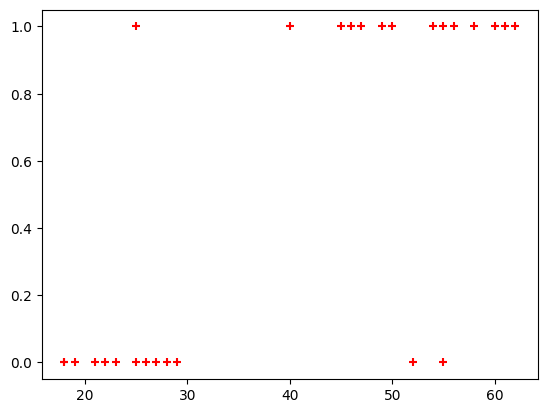

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [5]:
X_test

,age
6,55
19,18
5,56


In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [7]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
X_test

,age
6,55
19,18
5,56


In [9]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 1])

In [10]:
model.predict_proba(X_test)

array([[0.04178171, 0.95821829],
       [0.95864464, 0.04135536],
       [0.03549454, 0.96450546]])

In [11]:
model.score(X_test,y_test)

0.6666666666666666

In [12]:
X_test

,age
6,55
19,18
5,56


<h2 style="color:purple">Ejercicio</h2>

Descarga el conjunto de datos de retención de empleados desde aquí: https://www.kaggle.com/giripujar/hr-analytics. 
1. Ahora realiza un análisis exploratorio de datos para determinar qué variables tienen un impacto directo y claro en la retención de empleados (es decir, si dejan la compañía o continúan trabajando)
2. Grafica barras mostrando el impacto de los salarios de los empleados en la retención
3. Grafica barras mostrando la correlación entre departamento y retención de empleados
4. Ahora construye un modelo de regresión logística usando las variables que se redujeron en el paso 1
5. Mide la precisión del modelo